In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# now we predict the math score here now..

In [4]:
df = pd.read_csv('Data/StudentsPerformance.csv')

In [5]:
X= df.drop(columns='math score' , axis=1)
y = df['math score']


In [6]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


# Create transformer with three type of transformer

In [ ]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardSca     ler
from sklearn.compose import ColumnTransformer

categorical_features = OneHotEncoder()
numerical_features = StandardScaler()

preocessing = ColumnTransformer([

                ("OneHotEncoding", categorical_features,cat_features),
                ("Standerscaler" , numerical_features,num_features)
]
)

In [8]:
preocessing

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('OneHotEncoding', ...), ('Standerscaler', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` and ``f

In [9]:
X = preocessing.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)
X_train.shape ,y_train.shape

((800, 19), (800,))

In [ ]:
pd.DataFrame()

,math score
29,62
535,66
695,79
557,61
836,73
...,...
106,87
270,69
860,53
435,50


# Create an Evaluate function to give all metrics after model Training 

In [54]:
def evalution_model(true,predict):
    mse = mean_squared_error(true,predict)
    mae = mean_absolute_error(true,predict)
    rmse = np.sqrt(mean_squared_error(true,predict))
    r2 = r2_score(true,predict)
    return mae,rmse,r2

In [ ]:
models={

    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge" :Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "XG Boot Regressor":XGBRegressor(),
    "Ada Boost Regressor":AdaBoostRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(verbose=False),
}


model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train the Model

    #make Prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evalution Train  & Test Dataset
    model_train_mae,  model_train_rmse,  model_train_r2 = evalution_model(y_train,y_train_pred)

    model_test_mae,  model_test_rmse,  model_test_r2 = evalution_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2) 


    print("Model Performance for Training Dataset:")
    print(f" - Root Mean Squared Error : {model_train_rmse}")
    print(f" - mean Absolute Error: {model_train_mae}")
    print(f" -R2 Score {model_train_r2}")

    print('----------------------------------------------------')


    print("Model Performance for Test Dataset:")
    print(f" - Root Mean Squared Error : {model_test_rmse}")
    print(f" - mean Absolute Error: {model_test_mae}")
    print(f" -R2 Score {model_test_r2}")

    print('='*35)
    print('\n')




    





Linear Regression
Model Performance for Training Dataset:
 - Root Mean Squared Error : 5.323050852720514
 - mean Absolute Error: 4.266711846071957
 -R2 Score 0.8743172040139593
----------------------------------------------------
Model Performance for Test Dataset:
 - Root Mean Squared Error : 5.393993869732843
 - mean Absolute Error: 4.21476314247485
 -R2 Score 0.8804332983749565


Lasso
Model Performance for Training Dataset:
 - Root Mean Squared Error : 6.593815587795568
 - mean Absolute Error: 5.206302661246528
 -R2 Score 0.8071462015863455
----------------------------------------------------
Model Performance for Test Dataset:
 - Root Mean Squared Error : 6.519694535667422
 - mean Absolute Error: 5.157881810347764
 -R2 Score 0.8253197323627852


Ridge
Model Performance for Training Dataset:
 - Root Mean Squared Error : 5.323324922741654
 - mean Absolute Error: 4.264987823725981
 -R2 Score 0.8743042615212909
----------------------------------------------------
Model Performance for

# Results

In [82]:
pd.DataFrame(list(zip(model_list ,r2_list)), columns=['Model Name' , 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,Ada Boost Regressor,0.856302
8,Cat Boost Regressor,0.851632
5,RandomForestRegressor,0.849556
6,XG Boot Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,DecisionTreeRegressor,0.738718


# We Choose the Linear Regrsssion Model 

In [85]:
lin_regression = LinearRegression(fit_intercept=True)
lin_regression = lin_regression.fit(X_train,y_train)
y_pred = lin_regression.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("The accuracy of this model is '%.2f" %score)

The accuracy of this model is '88.04


# plot ypred & y_test

Text(0, 0.5, 'Predict')

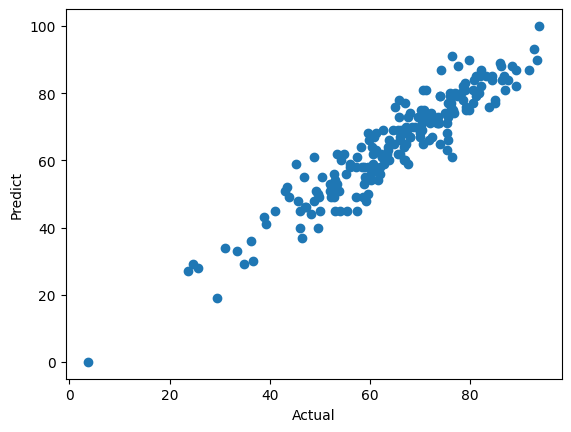

In [86]:
plt.scatter(y_pred,y_test)
plt.xlabel("Actual")
plt.ylabel("Predict")

<Axes: xlabel='math score'>

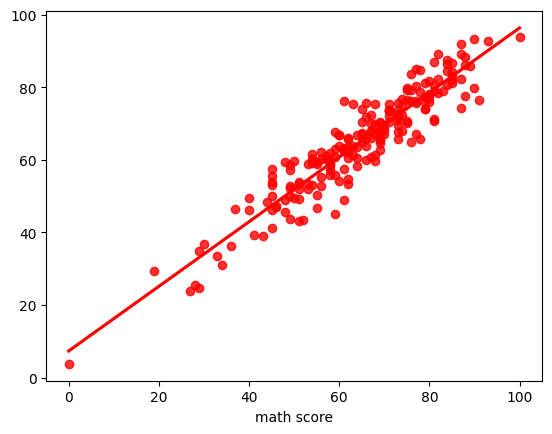

In [87]:
sns.regplot(x=y_test , y= y_pred , ci=None , color='red')

# diffrenet between actual & predict 

In [89]:
pred_df = pd.DataFrame({'Actual value':y_test , 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df


,Actual value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
